In [1]:
!pip install qiskit
!pip install qiskit pylatexenc --quiet
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 49.9 MB/s eta 0:00:00


**QFT**

It is just the classical version of the classical quantum fourier transform which is implemented via set of rotation gates

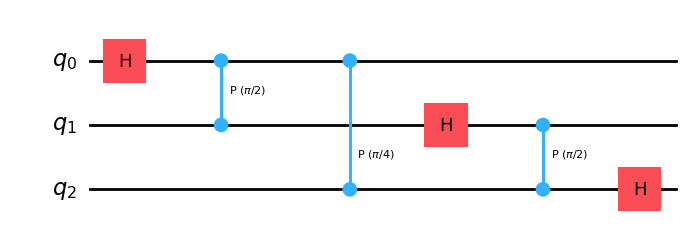

In [2]:
from qiskit import QuantumCircuit
import numpy as np

def qft(n):
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)
        for j in range(i+1, n):
            qc.cp(np.pi / 2**(j - i), j, i)
    qc.reverse_bits()
    return qc

# Example usage:
qc = qft(3)
qc.draw('mpl')


**INVERSE QFT**

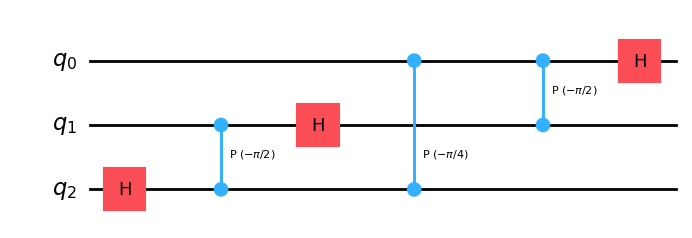

In [3]:
def inverse_qft(n):
    qc = QuantumCircuit(n)
    qc = qft(n).inverse()
    return qc

# Example usage:
qc1 = inverse_qft(3)
qc1.draw('mpl')

**QUANTUM PHASE ESTIMATION**

It allows us to find the eigen value of a unitary operator U which obviously agin a unitary value which can be represented on an argand palne with argument theta which is what we try to find with a precision of n bits.

In [10]:
theta = 1/16

n= 4  # gives ~4 bits of precision

# Total qubits: n_count (for counting) + 1 (for target)
qc = QuantumCircuit(n + 1, n)

# applying hadamard to get a superposition all posssible states
for q in range(n):
    qc.h(q)

#Initialize target qubit in |1⟩
qc.x(n)

#Apply controlled-U^(2^j) gates
for counting_qubit in range(n):
    repetitions = 2**counting_qubit
    for _ in range(repetitions):
        qc.cp(2 * np.pi * theta, counting_qubit, n)

#Apply inverse QFT to counting qubits
def inverse_qft(qc, n):
    for i in range(n//2):
        qc.swap(i, n - i - 1)
    for j in reversed(range(n)):
        for m in range(j):
            qc.cp(-np.pi / 2**(j - m), m, j)
        qc.h(j)

inverse_qft(qc, n)

qc.measure(range(n), range(n))
print(qc.draw())

     ┌───┐                                                               »
q_0: ┤ H ├─■─────────────────────────────────────────────────────────────»
     ├───┤ │                                                             »
q_1: ┤ H ├─┼────────■────────■───────────────────────────────────────────»
     ├───┤ │        │        │                                           »
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■───────»
     ├───┤ │        │        │        │        │        │        │       »
q_3: ┤ H ├─┼────────┼────────┼────────┼────────┼────────┼────────┼───────»
     ├───┤ │P(π/8)  │P(π/8)  │P(π/8)  │P(π/8)  │P(π/8)  │P(π/8)  │P(π/8) »
q_4: ┤ X ├─■────────■────────■────────■────────■────────■────────■───────»
     └───┘                                                               »
c: 4/════════════════════════════════════════════════════════════════════»
                                                                         »
«                        

In [11]:
from qiskit_aer import AerSimulator
from qiskit import transpile
sim = AerSimulator()
qc_transpiled = transpile(qc, sim)

# Step 3: Run the simulation
job = sim.run(qc_transpiled, shots=1024)
result = job.result()

# Step 4: Get classical counts
counts = result.get_counts()

# Step 5: Print the result
print("Classical Measurement Counts:")
for bitstring, count in counts.items():
    print(f"{bitstring}: {count}")

Classical Measurement Counts:
0010: 2
1010: 33
1011: 4
0001: 286
1111: 52
1100: 80
1000: 50
0110: 84
1101: 24
0000: 90
0111: 7
0011: 64
1110: 62
1001: 41
0101: 80
0100: 65


These binary strings have to interpreted as 0.x1x2x3x4 in binary representation. Thus according to our theta initially taken in U the count of 1/16 that is 0001 should be maximum which indeed is with 286.

With increase in number of qubits and shots in simulation we can get better precision.